# Electrical Fault Detection and Classification

### Project Objective

* Perform exploratory data analysis on transmission line fault datasets uisng data visualisation techniques to uncover hidden patterns, correlations, and class distributions.
* Develop and evalaute supervised machine learning models to accurately classfiy transmission line fault types, enabling intelligent fault detection in modern power systems. 

In [7]:
# Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

import os


In [67]:
# Load dataset containing classification data for electrical faults

df_class = pd.read_csv("classData.csv")

df_class.sample(5).style.set_properties(
    **{'background-color': 'lightgreen', 
       'color': 'black', 
       'border-color': 'black'}
)


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
3627,0,1,1,1,-314.421410,872.888213,-556.350124,0.028027,0.013496,-0.041523
5971,0,0,0,0,28.110810,-26.985977,-4.562765,0.540610,-0.045914,-0.494696
7633,0,0,0,0,55.619024,0.752626,-59.302432,0.098809,0.478436,-0.577245
3588,0,1,1,1,217.654977,633.720170,-849.250520,0.041194,-0.012053,-0.029141
2647,0,1,1,0,30.431470,320.251640,-347.966793,0.499106,0.037323,-0.536429


In [25]:
# Print a summary of DataFrame Structure
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [27]:
# Calculate total number of missing values across entire DataFrame
df_class.isnull().sum().sum()

0

In [29]:
# Understand how large the dataset is before applying data preprocessing steps
df_class.shape

(7861, 10)

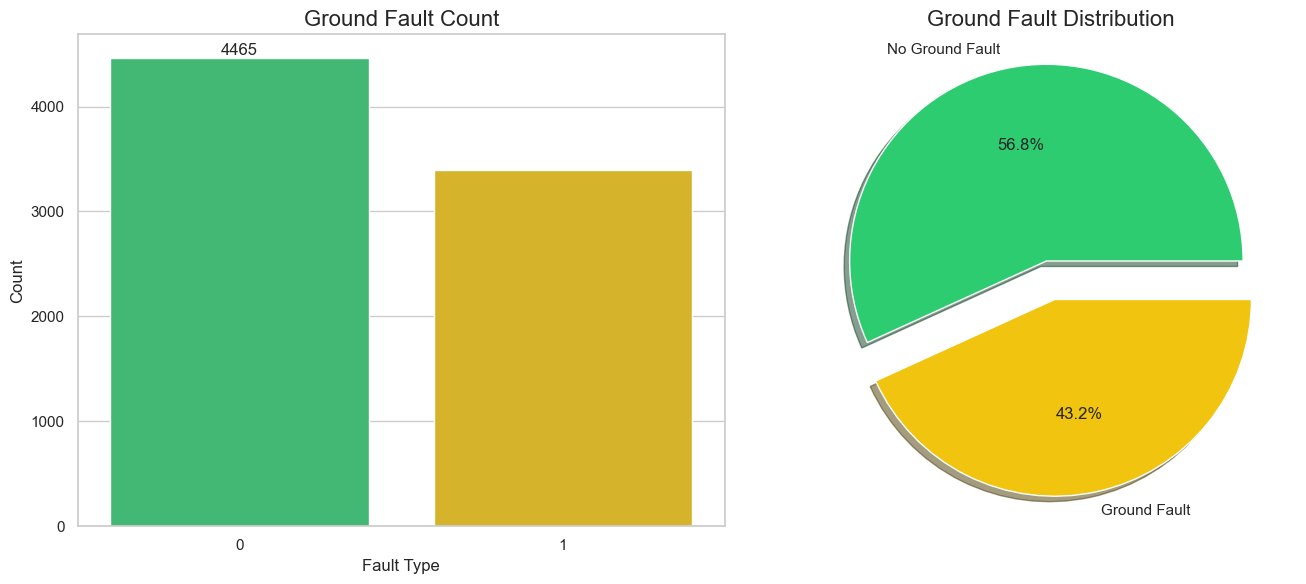

<Figure size 640x480 with 0 Axes>

In [41]:
# Define consistent colors for 0 = No Fault (Green), 1 = Fault (Yellow)
colors = {0: '#2ECC71', 1: '#F1C40F'}

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot using hue and color mapping
sns.countplot(
    x='G',
    data=df_class,
    hue='G',
    palette=colors,
    legend=False,
    ax=axes[0]
)
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title("Ground Fault Count", fontsize=16)
axes[0].set_xlabel("Fault Type")
axes[0].set_ylabel("Count")

# Pie chart
df_class['G'].value_counts().plot.pie(
    labels=['No Ground Fault', 'Ground Fault'],
    autopct='%1.1f%%',
    explode=[0.1, 0.1],
    shadow=True,
    colors=[colors[0], colors[1]],
    ax=axes[1]
)
axes[1].set_ylabel('')
axes[1].set_title("Ground Fault Distribution", fontsize=16)

plt.tight_layout()
plt.show()

plt.savefig('my_plot.png')


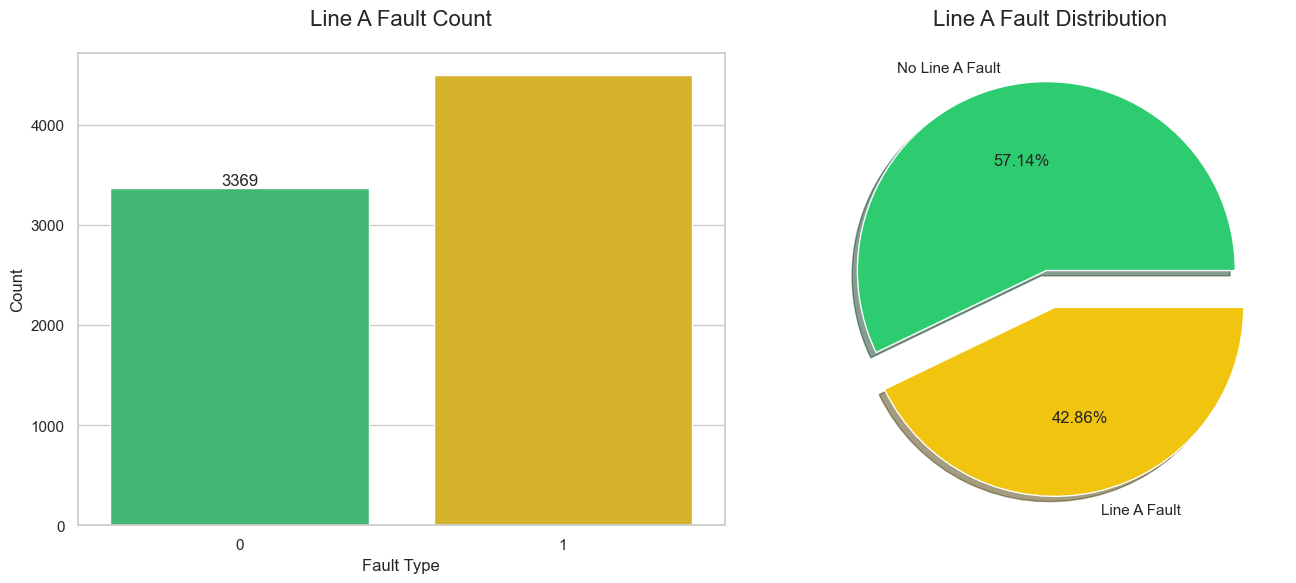

<Figure size 640x480 with 0 Axes>

In [49]:
# Define consistent colors
colors = {0: '#2ECC71', 1: '#F1C40F'}  # 0 = No Fault (Green), 1 = Fault (Yellow)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot with color mapping and no warning
sns.countplot(
    x='A',
    data=df_class,
    hue='A',
    palette=colors,
    legend=False,
    ax=axes[0]
)
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title("Line A Fault Count", fontsize=16, pad=20)
axes[0].set_xlabel("Fault Type")
axes[0].set_ylabel("Count")

# Pie chart
df_class['A'].value_counts().plot.pie(
    labels=['No Line A Fault', 'Line A Fault'],
    colors=[colors[0], colors[1]],
    autopct='%1.2f%%',
    explode=[0.1, 0.1],
    shadow=True,
    ax=axes[1]
)
axes[1].set_ylabel('')
axes[1].set_title("Line A Fault Distribution", fontsize=16, pad=20)

# Save and show
plt.tight_layout()
plt.show()

plt.savefig('my_plot1.png')


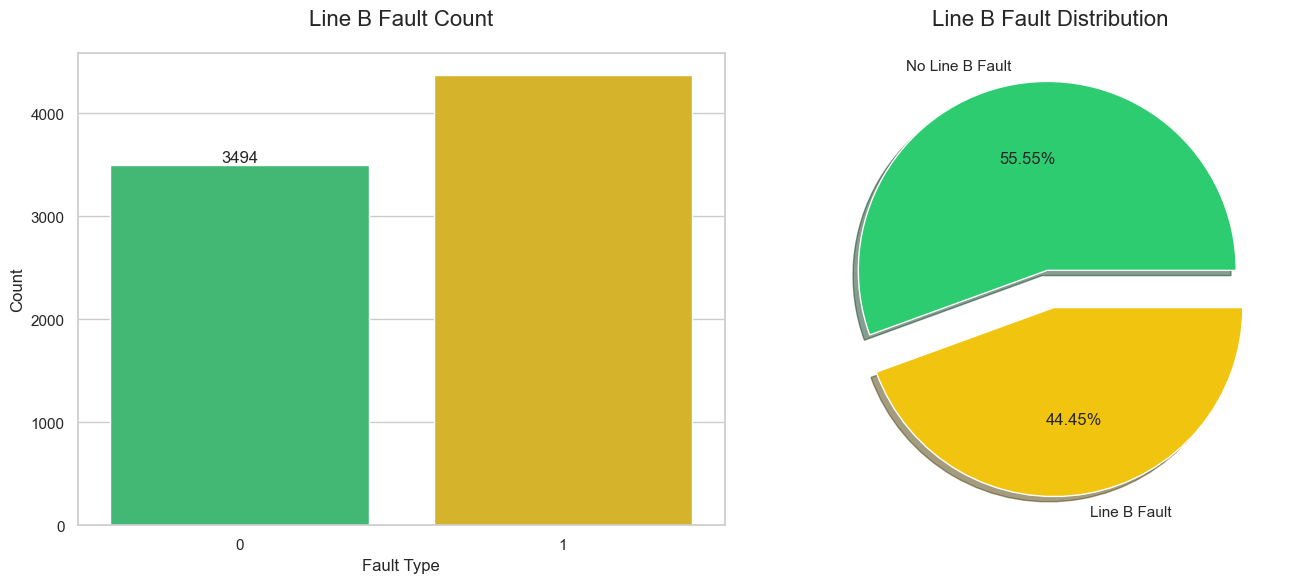

<Figure size 640x480 with 0 Axes>

In [57]:
# Define consistent colors
colors = {0: '#2ECC71', 1: '#F1C40F'}  # 0 = No Fault (Green), 1 = Fault (Yellow)

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot
sns.countplot(
    x='B',
    data=df_class,
    hue='B',
    palette=colors,
    legend=False,
    ax=axes[0]
)
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title("Line B Fault Count", fontsize=16, pad=20)
axes[0].set_xlabel("Fault Type")
axes[0].set_ylabel("Count")

# Pie chart
df_class['B'].value_counts().plot.pie(
    labels=['No Line B Fault', 'Line B Fault'],
    colors=[colors[0], colors[1]],
    explode=[0.1, 0.1],
    autopct='%1.2f%%',
    shadow=True,
    ax=axes[1]
)
axes[1].set_ylabel('')
axes[1].set_title("Line B Fault Distribution", fontsize=16, pad=20)

# Save and show
plt.tight_layout()
plt.show()

plt.savefig('my_plot2.png')

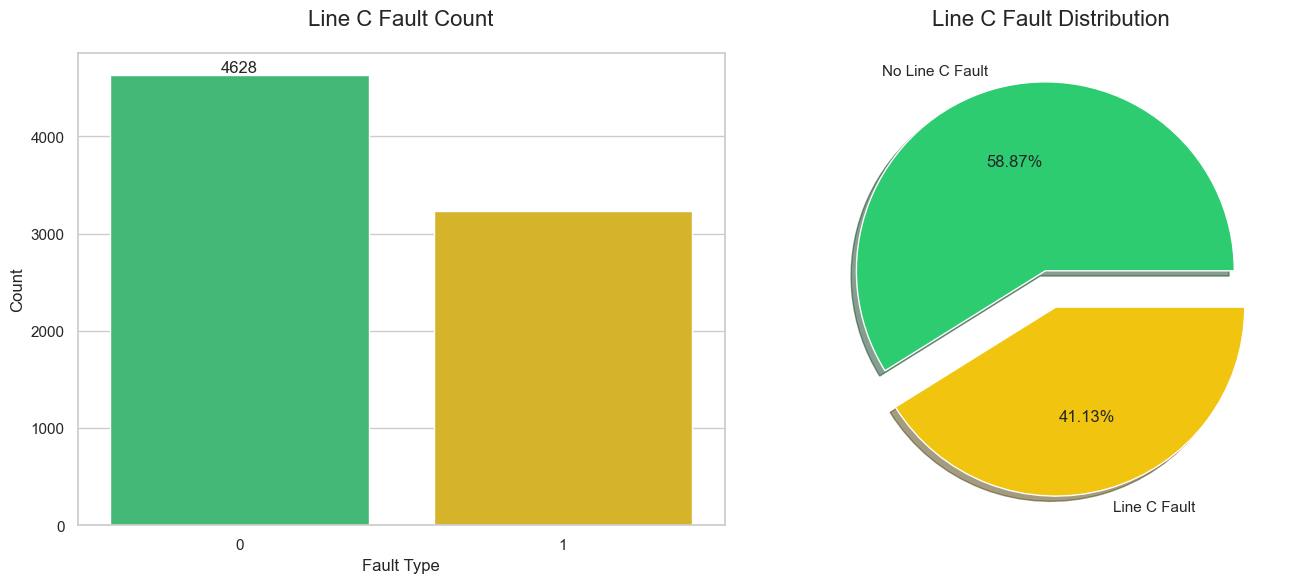

<Figure size 640x480 with 0 Axes>

In [61]:
# Define consistent colors
colors = {0: '#2ECC71', 1: '#F1C40F'}  # 0 = No Fault (Green), 1 = Fault (Yellow)

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot
sns.countplot(
    x='C',
    data=df_class,
    hue='C',
    palette=colors,
    legend=False,
    ax=axes[0]
)
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title("Line C Fault Count", fontsize=16, pad=20)
axes[0].set_xlabel("Fault Type")
axes[0].set_ylabel("Count")

# Pie chart
df_class['C'].value_counts().plot.pie(
    labels=['No Line C Fault', 'Line C Fault'],
    colors=[colors[0], colors[1]],
    explode=[0.1, 0.1],
    autopct='%1.2f%%',
    shadow=True,
    ax=axes[1]
)
axes[1].set_ylabel('')
axes[1].set_title("Line C Fault Distribution", fontsize=16, pad=20)

# Display plot
plt.tight_layout()
plt.show()

plt.savefig('myplot3.png')


In [71]:
# Combining all fault types together into one - Fault_Type

df_class['Fault_Type'] = (
    df_class['G'].astype('str') +
    df_class['C'].astype('str') +
    df_class['B'].astype('str') +
    df_class['A'].astype('str')
)

df_class.head().style.set_properties(
    **{
        'background-color': 'lightblue',
        'color': 'black',
        'border-color': 'black'
    }
)


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [87]:
# Assigning proper fault names based on the composite 'Fault_Type' values

df_class.loc[df_class['Fault_Type'] == '0000', 'Fault_Type'] = 'NO Fault'
df_class.loc[df_class['Fault_Type'] == '1001', 'Fault_Type'] = 'Line A to Ground Fault'
df_class.loc[df_class['Fault_Type'] == '0110', 'Fault_Type'] = 'Line B to Line C Fault'
df_class.loc[df_class['Fault_Type'] == '1011', 'Fault_Type'] = 'Line A Line B to Ground Fault'
df_class.loc[df_class['Fault_Type'] == '0111', 'Fault_Type'] = 'Line A Line B Line C Fault'
df_class.loc[df_class['Fault_Type'] == '1111', 'Fault_Type'] = 'Line A Line B Line C to Ground Fault'

df_class.sample(10).style.set_properties(**{'background-color': 'lightblue', 
                                            'color': 'black',
                                            'border-color': 'black'
                                            })

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
963,1,0,0,1,354.082001,64.693416,-44.946497,-0.369823,0.435665,-0.065842,Line A to Ground Fault
4658,1,1,1,1,539.482741,335.960313,-875.443746,0.041727,-0.027183,-0.014544,Line A Line B Line C to Ground Fault
2318,0,1,1,0,55.537675,-555.862907,503.053599,0.263225,0.029504,-0.292729,Line B to Line C Fault
2809,0,1,1,0,-8.362759,-658.035804,668.790533,-0.392236,-0.019573,0.411809,Line B to Line C Fault
7148,0,0,0,0,8.532070,-29.096404,17.493715,0.592162,-0.256706,-0.335455,NO Fault
236,1,0,0,1,879.342097,52.810696,1.317679,-0.062236,-0.204515,0.266751,Line A to Ground Fault
7151,0,0,0,0,11.398612,-29.798336,15.329990,0.590036,-0.230991,-0.359045,NO Fault
1418,1,0,1,1,594.663508,249.342917,50.247045,0.040881,-0.372544,0.331663,Line A Line B to Ground Fault
5326,1,1,1,1,353.807400,-878.313843,524.504180,-0.026539,-0.015305,0.041844,Line A Line B Line C to Ground Fault
4880,1,1,1,1,-270.036043,-593.785908,863.819698,-0.041758,0.014636,0.027122,Line A Line B Line C to Ground Fault


In [89]:
# Show stats of dataframe with a rainbow gradient background, formatted to 3dp for better readability

df_class.describe().style.background_gradient(cmap='rainbow').format("{:.3f}")


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000,7861.000,7861.000,7861.000,7861.000,7861.000,7861.000,7861.000,7861.000,7861.000
mean,0.432,0.411,0.556,0.571,13.721,-44.845,34.392,-0.008,0.001,0.007
std,0.495,0.492,0.497,0.495,464.742,439.269,371.107,0.289,0.313,0.308
min,0.000,0.000,0.000,0.000,-883.542,-900.527,-883.358,-0.621,-0.608,-0.613
25%,0.000,0.000,0.000,0.000,-119.803,-271.846,-61.034,-0.130,-0.160,-0.216
50%,0.000,0.000,1.000,1.000,2.043,5.513,-4.327,-0.005,0.002,0.009
75%,1.000,1.000,1.000,1.000,227.246,91.194,49.115,0.112,0.154,0.240
max,1.000,1.000,1.000,1.000,885.739,889.869,901.274,0.595,0.628,0.600


In [91]:
# Understand the distribution of different fault types in the dataset

df_class['Fault_Type'].value_counts(ascending=False)

Fault_Type
NO Fault                                2365
Line A Line B to Ground Fault           1134
Line A Line B Line C to Ground Fault    1133
Line A to Ground Fault                  1129
Line A Line B Line C Fault              1096
Line B to Line C Fault                  1004
Name: count, dtype: int64

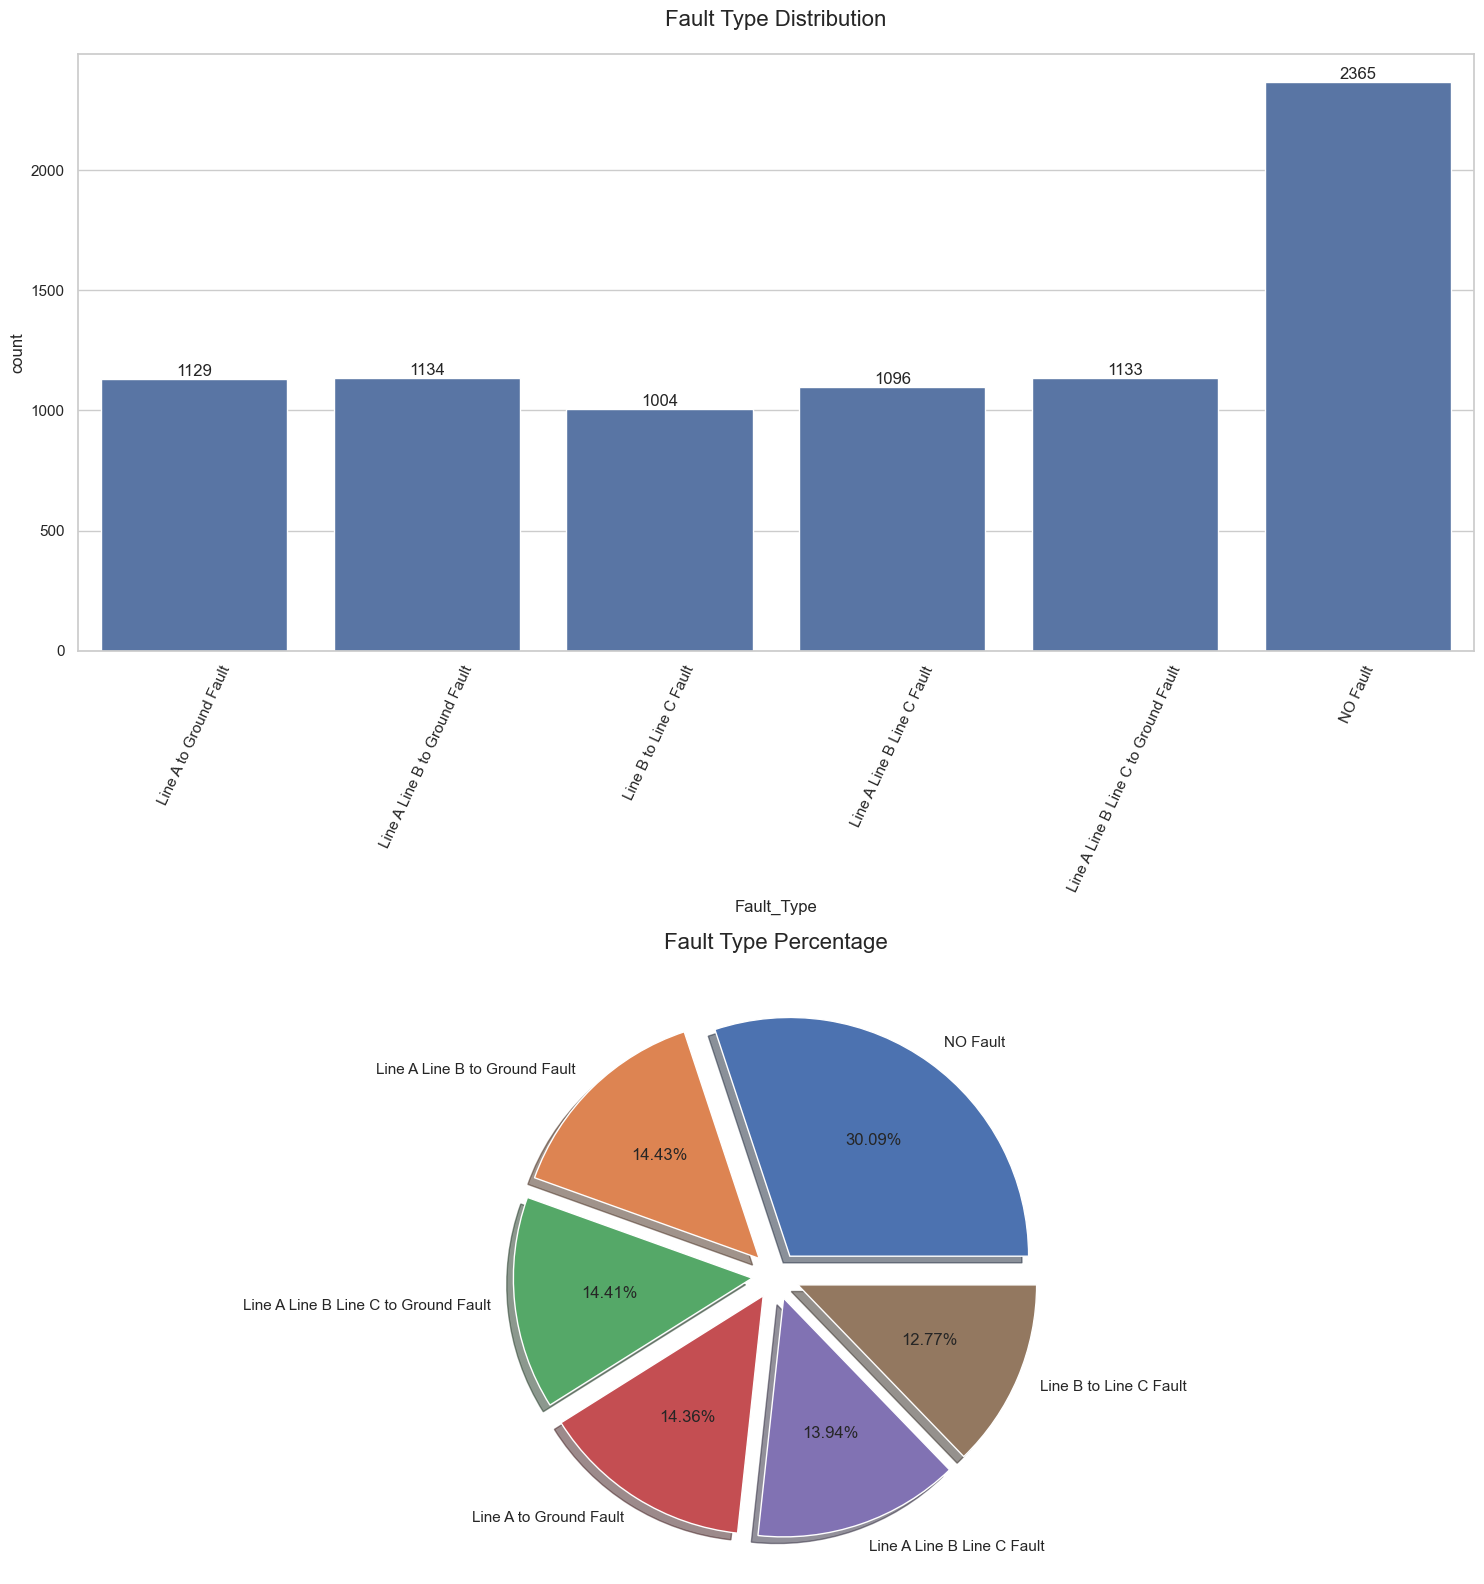

<Figure size 640x480 with 0 Axes>

In [103]:
plt.figure(figsize=(15, 16))

# Countplot for Fault_Type
ax1 = plt.subplot(2, 1, 1)
sns.countplot(x='Fault_Type', data=df_class, ax=ax1)
ax1.bar_label(ax1.containers[0])
ax1.set_title("Fault Type Distribution", fontsize=16, pad=20)
plt.xticks(rotation=65)  # Rotate tick labels safely here
plt.tight_layout()

# Pie chart for Fault_Type proportions
ax2 = plt.subplot(2, 1, 2)
df_class['Fault_Type'].value_counts().plot.pie(
    explode=[0.1]*6,
    autopct='%1.2f%%',
    shadow=True,
    ax=ax2
)
ax2.set_ylabel('')
ax2.set_title("Fault Type Percentage", fontsize=16, pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

plt.savefig('my_plot4.png')


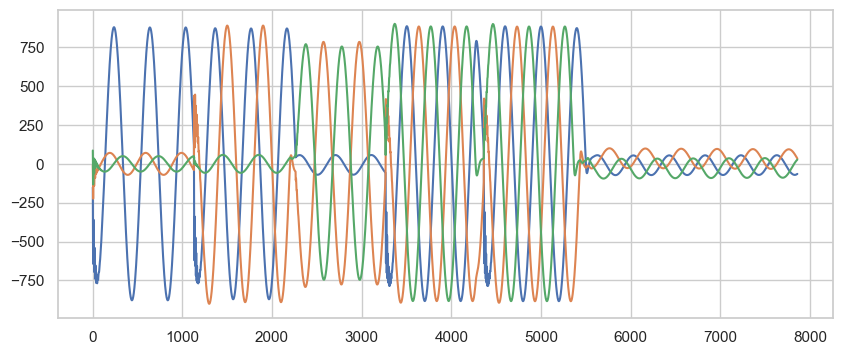

In [105]:
plt.figure(figsize = (10,4))
plt.plot(df_class["Ia"])
plt.plot(df_class["Ib"])
plt.plot(df_class["Ic"]);

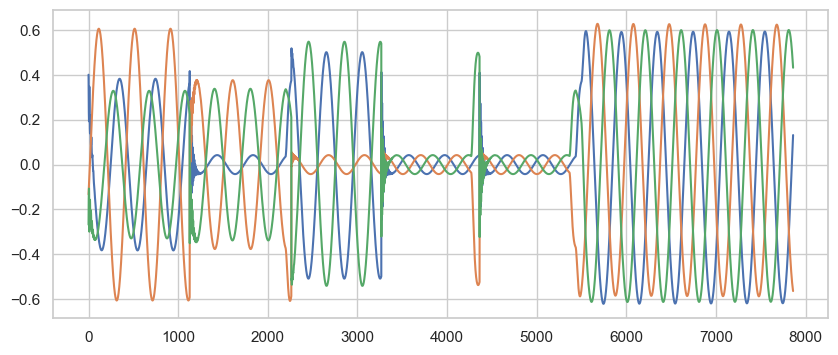

In [107]:
plt.figure(figsize = (10,4))
plt.plot(df_class["Va"])
plt.plot(df_class["Vb"])
plt.plot(df_class["Vc"]);

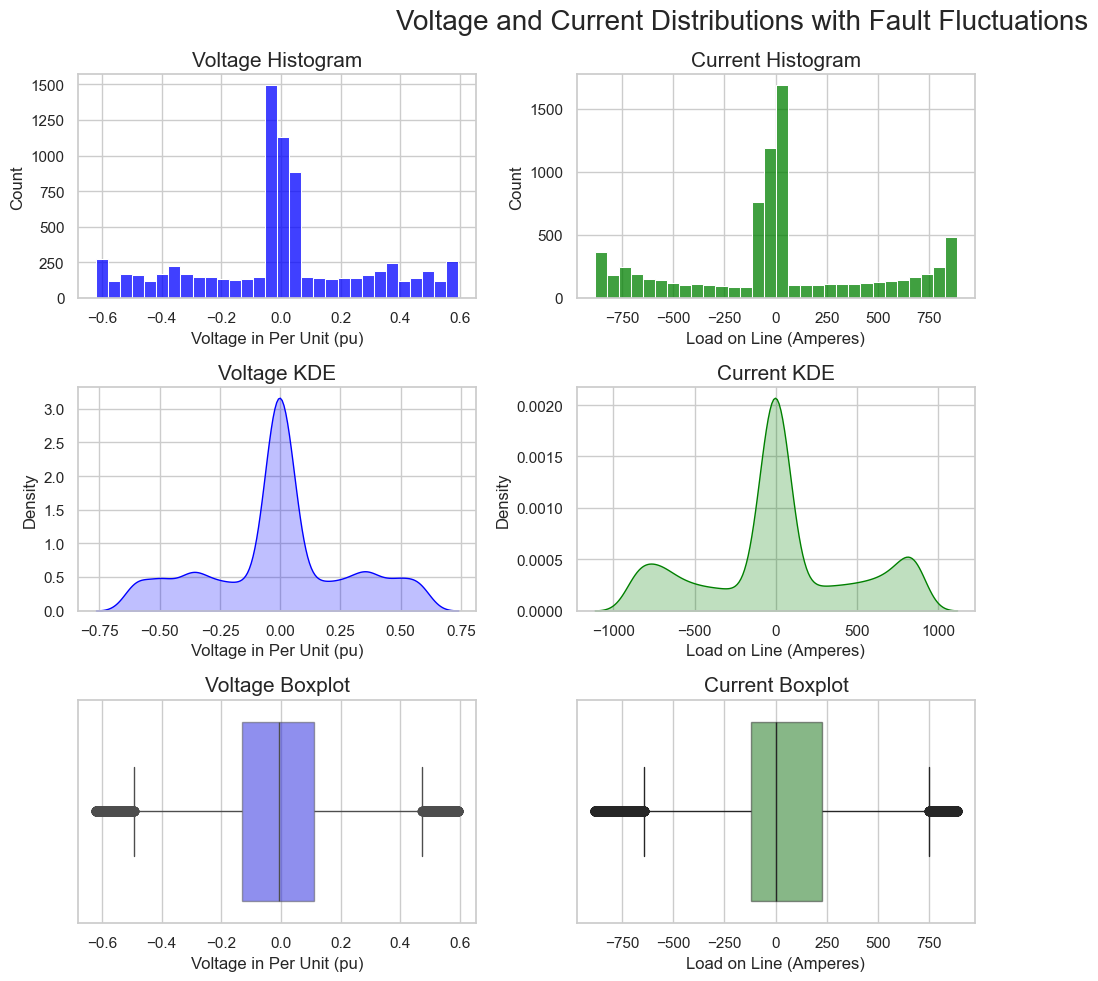

In [139]:
plt.figure(figsize=(15, 10))
plt.suptitle("Voltage and Current Distributions with Fault Fluctuations", fontsize=20)

# Histograms
plt.subplot(3, 3, 1)
sns.histplot(df_class['Va'], bins=30, kde=False, color='blue')
plt.xlabel('Voltage in Per Unit (pu)', fontsize=12)
plt.ylabel('Count')
plt.title('Voltage Histogram', fontsize=15)

plt.subplot(3, 3, 2)
sns.histplot(df_class['Ia'], bins=30, kde=False, color='green')
plt.xlabel('Load on Line (Amperes)', fontsize=12)
plt.ylabel('Count')
plt.title('Current Histogram', fontsize=15)

# KDE Plots with updated fill parameter
plt.subplot(3, 3, 4)
sns.kdeplot(df_class['Va'], fill=True, color='blue')
plt.xlabel('Voltage in Per Unit (pu)', fontsize=12)
plt.ylabel('Density')
plt.title('Voltage KDE', fontsize=15)

plt.subplot(3, 3, 5)
sns.kdeplot(df_class['Ia'], fill=True, color='green')
plt.xlabel('Load on Line (Amperes)', fontsize=12)
plt.ylabel('Density')
plt.title('Current KDE', fontsize=15)

# Box Plots
plt.subplot(3, 3, 7)
sns.boxplot(x=df_class['Va'], color='blue', boxprops=dict(alpha=0.5))
plt.xlabel('Voltage in Per Unit (pu)', fontsize=12)
plt.title('Voltage Boxplot', fontsize=15)

plt.subplot(3, 3, 8)
sns.boxplot(x=df_class['Ia'], color='green', boxprops=dict(alpha=0.5))
plt.xlabel('Load on Line (Amperes)', fontsize=12)
plt.title('Current Boxplot', fontsize=15)

plt.tight_layout()
plt.show()


### Seperating Faults into Different Categories 

#### 1. No Fault (Healthy System) ⚡🫡

In [146]:
No_Fault = df_class[df_class['Fault_Type'] == 'NO Fault' ]

No_Fault.sample(5).style.set_properties(**{'background-color': 'lightblue',
                                           'color': 'black',
                                           'border-color': 'black'
                                           })

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
7057,0,0,0,0,-66.457743,39.871075,23.489077,0.102811,-0.553763,0.450952,NO Fault
7686,0,0,0,0,33.495032,51.739591,-88.150514,-0.378029,0.619342,-0.241313,NO Fault
5649,0,0,0,0,52.722769,21.855917,-77.040489,-0.055375,0.565813,-0.510438,NO Fault
5570,0,0,0,0,40.154233,-29.180702,-6.526175,0.548704,-0.054421,-0.494283,NO Fault
5783,0,0,0,0,-55.452583,97.493242,-45.500410,-0.514573,-0.025027,0.539600,NO Fault


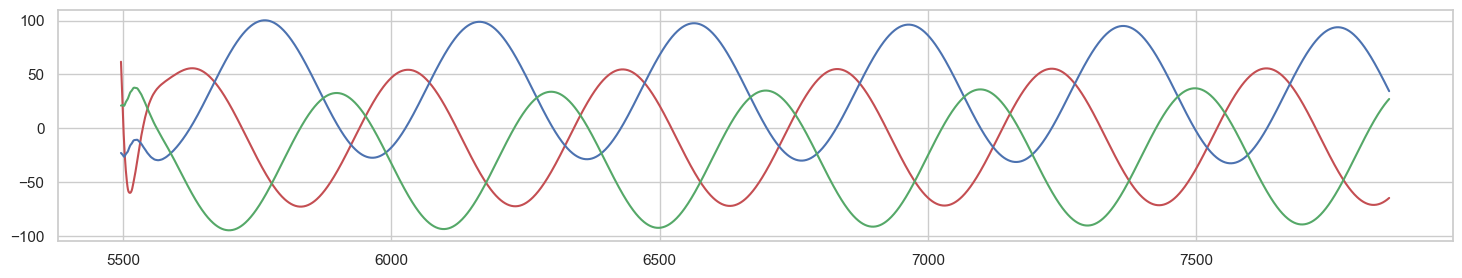

In [151]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(No_Fault["Ia"],'r')
ax = plt.plot(No_Fault["Ib"],'b')
ax = plt.plot(No_Fault["Ic"],'g');

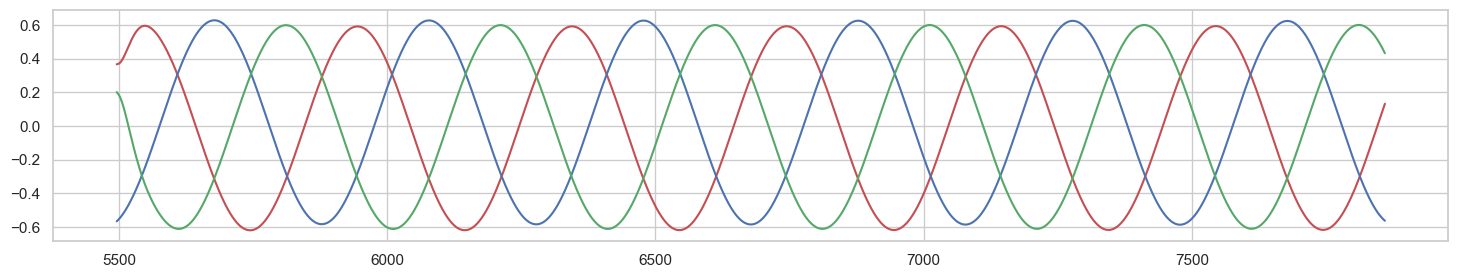

In [153]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(No_Fault["Va"],'r')
ax = plt.plot(No_Fault["Vb"],'b')
ax = plt.plot(No_Fault["Vc"],'g');

In a normal (No_Fault) condition Voltage or Current graph, is symmetrical and sinusoidal in nature with current and voltage 120 degree in phase shift and maximum current is approximately +100 to -100 Amperes and voltage +0.5 pu to -0.5pu!

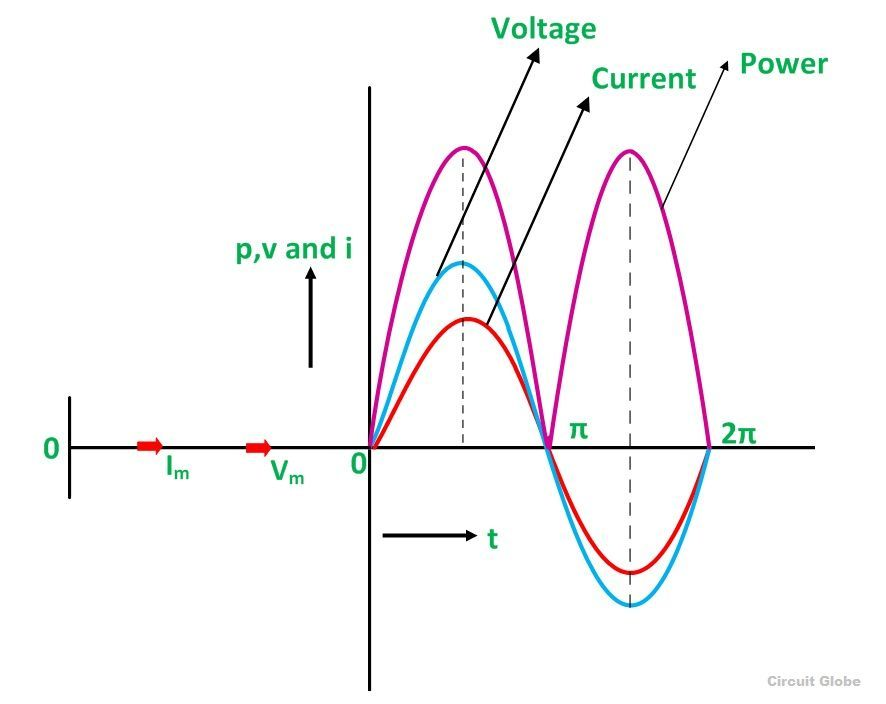

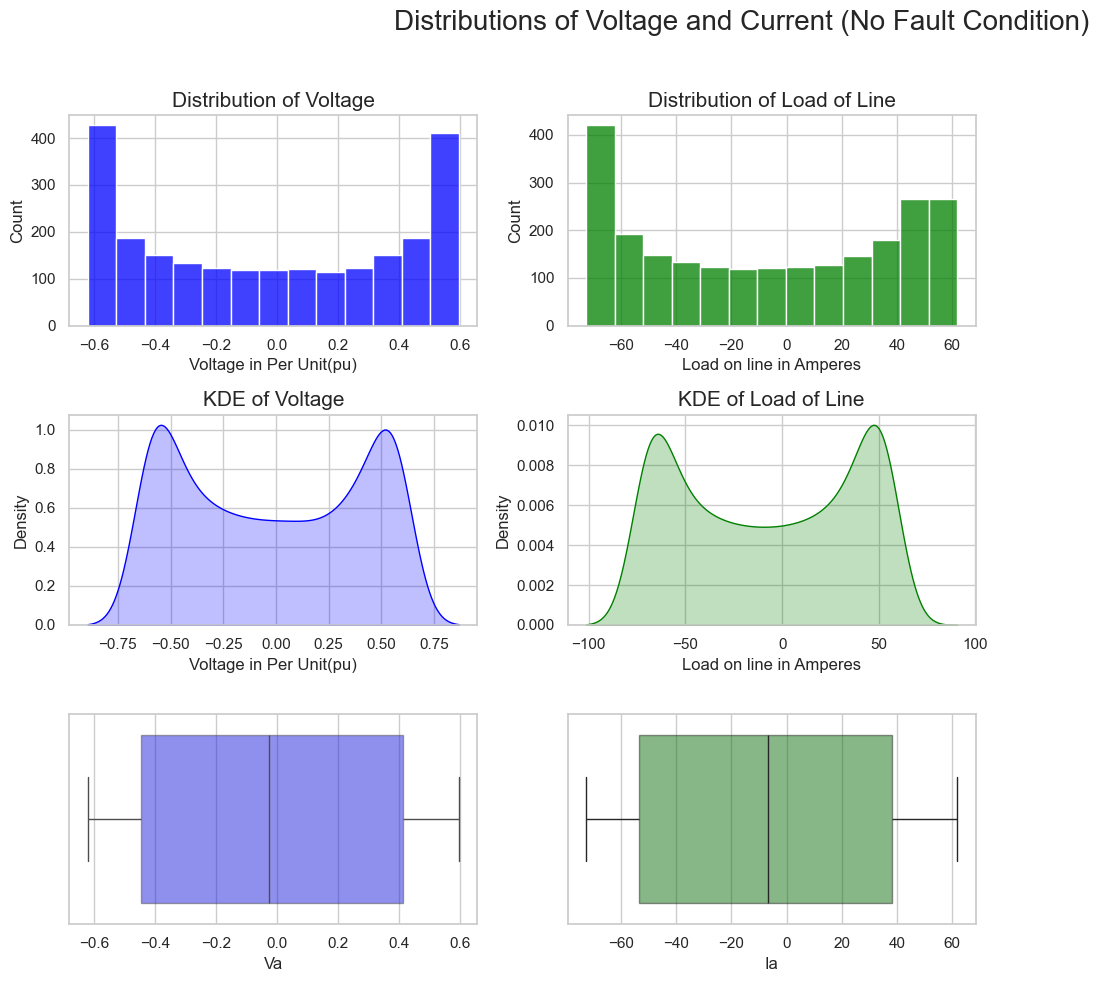

In [163]:
plt.figure(figsize=(15, 10))
plt.suptitle("Distributions of Voltage and Current (No Fault Condition)", fontsize=20)

# Histograms
plt.subplot(3, 3, 1)
sns.histplot(No_Fault['Va'], kde=False, color='blue')
plt.xlabel('Voltage in Per Unit(pu)', fontsize=12)
plt.title('Distribution of Voltage', fontsize=15)

plt.subplot(3, 3, 2)
sns.histplot(No_Fault['Ia'], kde=False, color='green')
plt.xlabel('Load on line in Amperes', fontsize=12)
plt.title('Distribution of Load of Line', fontsize=15)

# KDE Plots
plt.subplot(3, 3, 4)
sns.kdeplot(No_Fault['Va'], fill=True, color='blue')
plt.xlabel('Voltage in Per Unit(pu)', fontsize=12)
plt.title('KDE of Voltage', fontsize=15)

plt.subplot(3, 3, 5)
sns.kdeplot(No_Fault['Ia'], fill=True, color='green')
plt.xlabel('Load on line in Amperes', fontsize=12)
plt.title('KDE of Load of Line', fontsize=15)

# Box Plots
plt.subplot(3, 3, 7)
sns.boxplot(x=No_Fault['Va'], color='blue', boxprops=dict(alpha=0.5))

plt.subplot(3, 3, 8)
sns.boxplot(x=No_Fault['Ia'], color='green', boxprops=dict(alpha=0.5))

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave room for suptitle
plt.show()


#### 2. Faulty System with Line A to Ground Fault 🗿

In [175]:
Line_AG_Fault = df_class[df_class['Fault_Type'] == 'Line A to Ground Fault' ]
Line_AG_Fault.head().style.set_properties(**{'background-color': 'lightblue',
                                             'color': 'black',
                                             'border-color': 'black'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


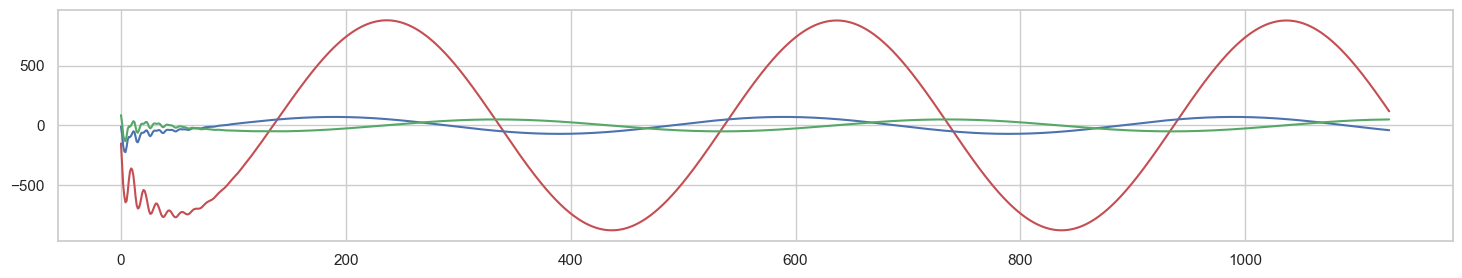

In [177]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_AG_Fault["Ia"],'r')
ax = plt.plot(Line_AG_Fault["Ib"],'b')
ax = plt.plot(Line_AG_Fault["Ic"],'g');

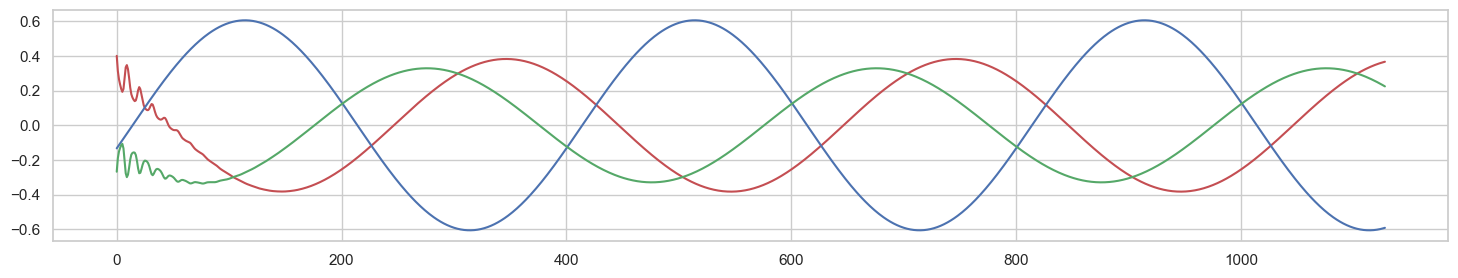

In [179]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_AG_Fault["Va"],'r')
ax = plt.plot(Line_AG_Fault["Vb"],'b')
ax = plt.plot(Line_AG_Fault["Vc"],'g');

At a time of Line A to grounf fault the current in line A increases to 10 fold approximately 1000 Ampears form normal 100 Ampears and voltage reduced.

#### 3. Faulty System with Line A, Line B to Ground Fault ⚡

In [183]:
Line_ABG_Fault = df_class[df_class['Fault_Type'] == 'Line A Line B to Ground Fault' ]
Line_ABG_Fault.head().style.set_properties(**{'background-color': 'lightblue',
                                              'color': 'black',
                                              'border-color': 'black'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
1129,1,0,1,1,-83.713374,42.102812,38.015631,0.416930,-0.066439,-0.350491,Line A Line B to Ground Fault
1130,1,0,1,1,-304.258650,243.536374,42.670680,0.097053,0.089765,-0.186818,Line A Line B to Ground Fault
1131,1,0,1,1,-487.104324,377.325956,29.573282,-0.132447,0.203226,-0.070779,Line A Line B to Ground Fault
1132,1,0,1,1,-603.543045,439.399623,9.638569,-0.248609,0.263483,-0.014873,Line A Line B to Ground Fault
1133,1,0,1,1,-620.718849,423.222790,0.613787,-0.226918,0.254651,-0.027733,Line A Line B to Ground Fault


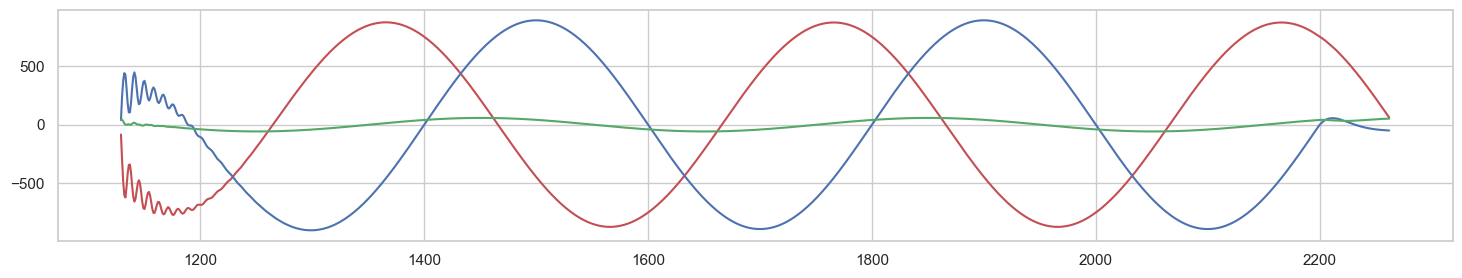

In [185]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABG_Fault["Ia"],'r')
ax = plt.plot(Line_ABG_Fault["Ib"],'b')
ax = plt.plot(Line_ABG_Fault["Ic"],'g');

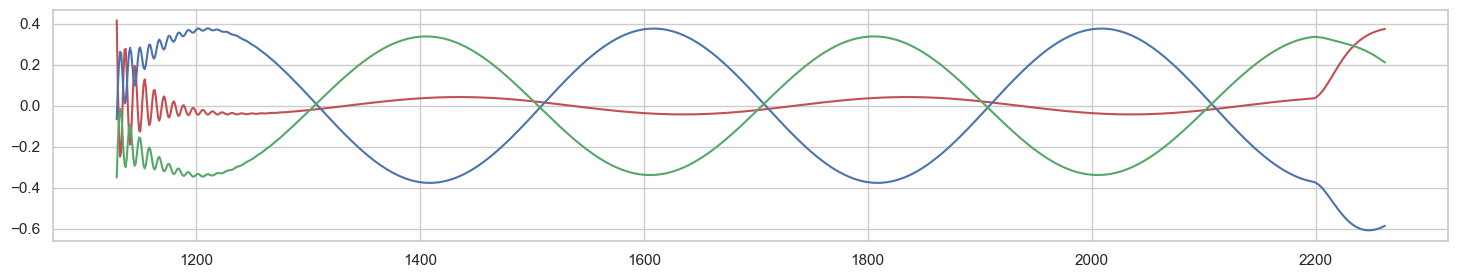

In [187]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABG_Fault["Va"],'r')
ax = plt.plot(Line_ABG_Fault["Vb"],'b')
ax = plt.plot(Line_ABG_Fault["Vc"],'g');

#### 4. Faulty System with Line B to Line C ⚡

In [190]:
Line_BC_Fault = df_class[df_class['Fault_Type'] == 'Line B to Line C Fault' ]
Line_BC_Fault.head().style.set_properties(**{'background-color': 'lightblue', 
                                             'color': 'black',
                                             'border-color': 'black'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
2263,0,1,1,0,41.764455,-93.940215,55.022192,0.517510,-0.003685,-0.513825,Line B to Line C Fault
2264,0,1,1,0,42.394348,-105.038998,65.494029,0.518491,-0.008071,-0.510420,Line B to Line C Fault
2265,0,1,1,0,43.010571,-105.734383,65.569977,0.511217,0.003798,-0.515015,Line B to Line C Fault
2266,0,1,1,0,43.612456,-100.121739,59.347319,0.499096,0.025105,-0.524201,Line B to Line C Fault
2267,0,1,1,0,44.202230,-95.078643,53.707382,0.487527,0.045052,-0.532579,Line B to Line C Fault


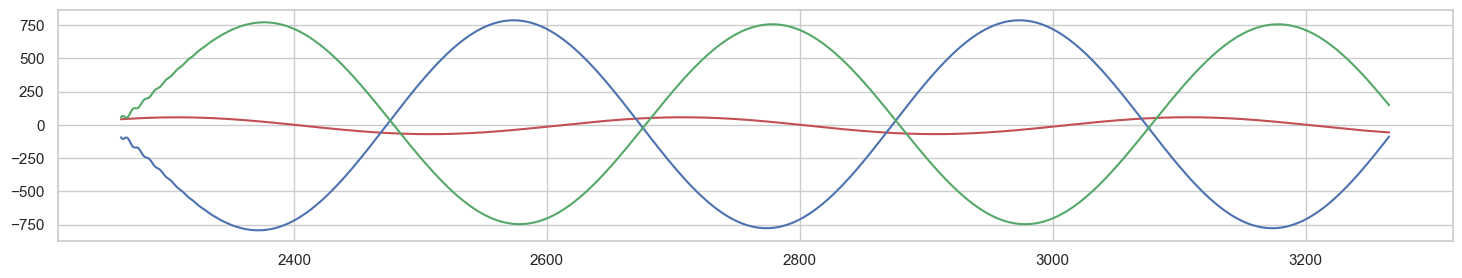

In [192]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_BC_Fault["Ia"],'r')
ax = plt.plot(Line_BC_Fault["Ib"],'b')
ax = plt.plot(Line_BC_Fault["Ic"],'g');

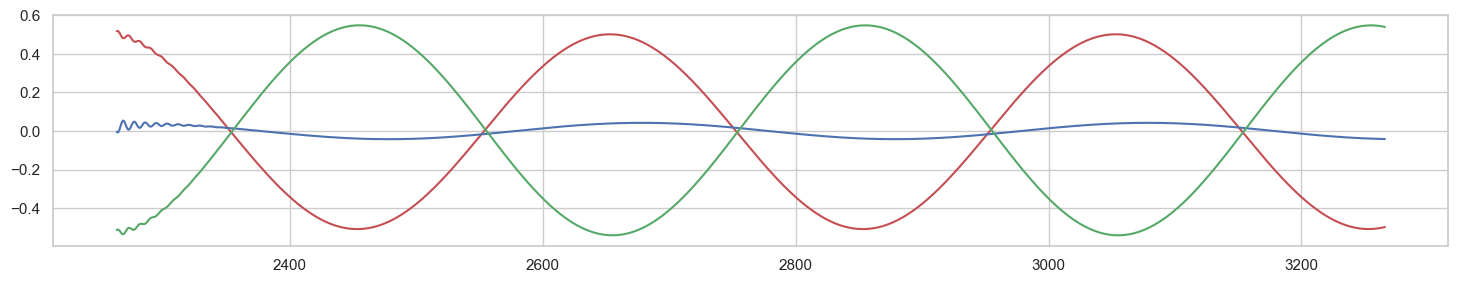

In [194]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_BC_Fault["Va"],'r')
ax = plt.plot(Line_BC_Fault["Vb"],'b')
ax = plt.plot(Line_BC_Fault["Vc"],'g');

#### 5. Faulty System with Line A - Line B - Line C ⚡

In [213]:
Line_ABC_Fault = df_class[df_class['Fault_Type'] == 'Line A Line B Line C Fault' ]
Line_ABC_Fault.head().style.set_properties(**{'background-color': 'lightblue',
                                              'color': 'black',
                                              'border-color': 'black'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
3267,0,1,1,1,-99.274309,44.146905,57.318650,0.412305,-0.091525,-0.320781,Line A Line B Line C Fault
3268,0,1,1,1,-342.196277,218.566556,125.820753,0.095905,-0.003471,-0.092434,Line A Line B Line C Fault
3269,0,1,1,1,-526.696029,347.197345,181.689494,-0.131094,0.056790,0.074304,Line A Line B Line C Fault
3270,0,1,1,1,-633.453623,416.942091,218.702118,-0.245984,0.084683,0.161301,Line A Line B Line C Fault
3271,0,1,1,1,-639.192926,412.122656,229.260639,-0.224523,0.075580,0.148943,Line A Line B Line C Fault


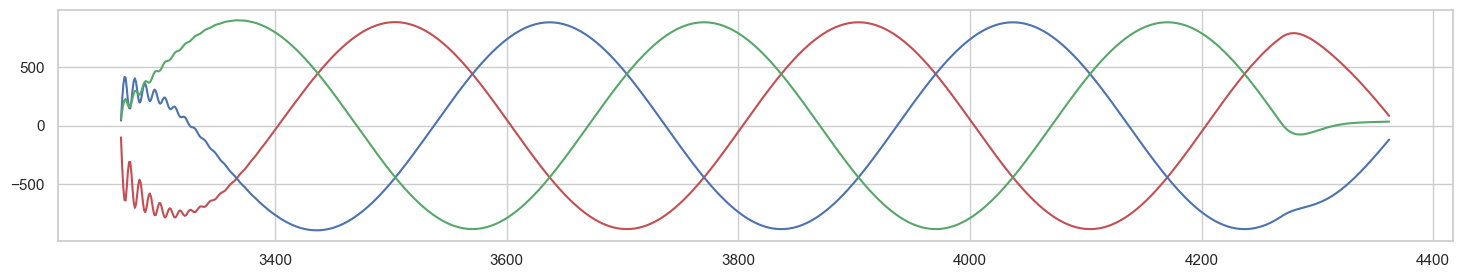

In [215]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABC_Fault["Ia"],'r')
ax = plt.plot(Line_ABC_Fault["Ib"],'b')
ax = plt.plot(Line_ABC_Fault["Ic"],'g');

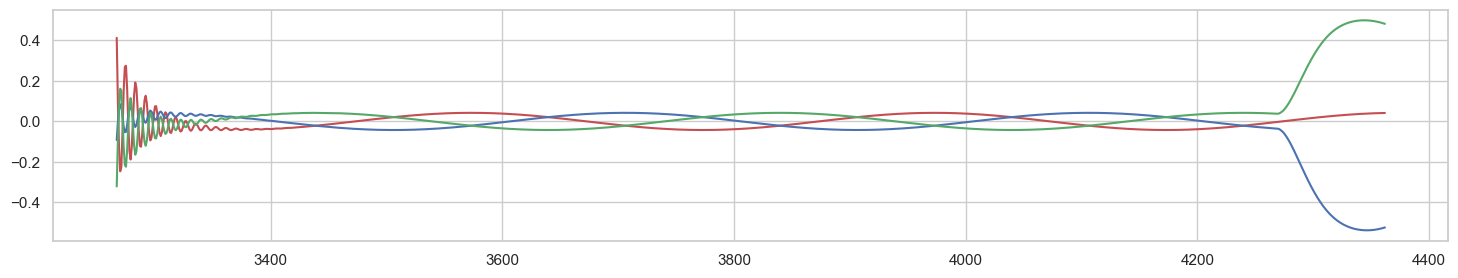

In [217]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABC_Fault["Va"],'r')
ax = plt.plot(Line_ABC_Fault["Vb"],'b')
ax = plt.plot(Line_ABC_Fault["Vc"],'g');

#### 6. Faulty System with Line A - Line B - Line C - Ground ⚡

In [221]:
Line_ABCG_Fault = df_class[df_class['Fault_Type'] == 'Line A Line B Line C to Ground Fault' ]
Line_ABCG_Fault.head().style.set_properties(**{'background-color': 'lightblue',
                                               'color': 'black',
                                               'border-color': 'black'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
4363,1,1,1,1,-99.252463,52.717974,48.341534,0.410059,-0.086914,-0.323145,Line A Line B Line C to Ground Fault
4364,1,1,1,1,-342.238819,224.821345,119.149604,0.095347,-0.002326,-0.093021,Line A Line B Line C to Ground Fault
4365,1,1,1,1,-526.874012,351.614759,176.674369,-0.130437,0.055441,0.074996,Line A Line B Line C to Ground Fault
4366,1,1,1,1,-633.768916,420.246089,214.577137,-0.244709,0.082066,0.162643,Line A Line B Line C to Ground Fault
4367,1,1,1,1,-639.566896,415.329565,225.117414,-0.223359,0.073192,0.150167,Line A Line B Line C to Ground Fault


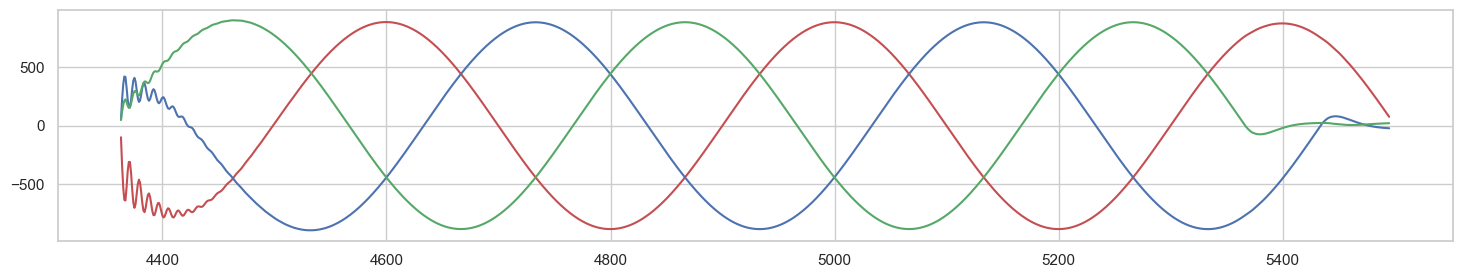

In [223]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABCG_Fault["Ia"],'r')
ax = plt.plot(Line_ABCG_Fault["Ib"],'b')
ax = plt.plot(Line_ABCG_Fault["Ic"],'g');

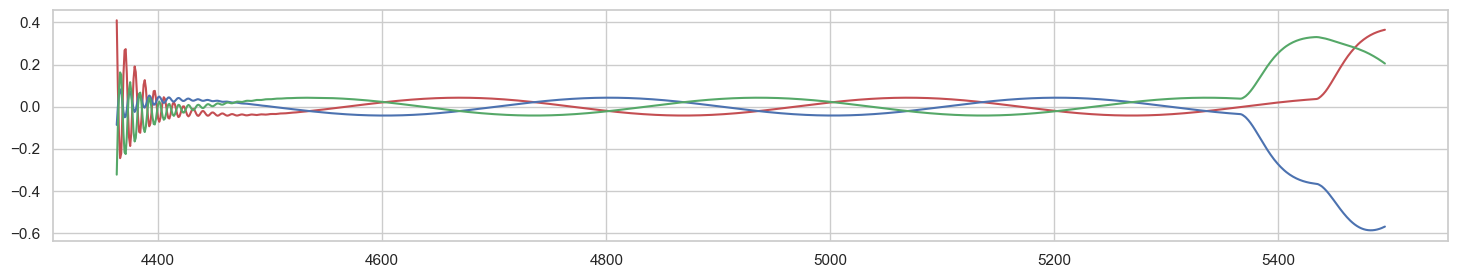

In [225]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABCG_Fault["Va"],'r')
ax = plt.plot(Line_ABCG_Fault["Vb"],'b')
ax = plt.plot(Line_ABCG_Fault["Vc"],'g');

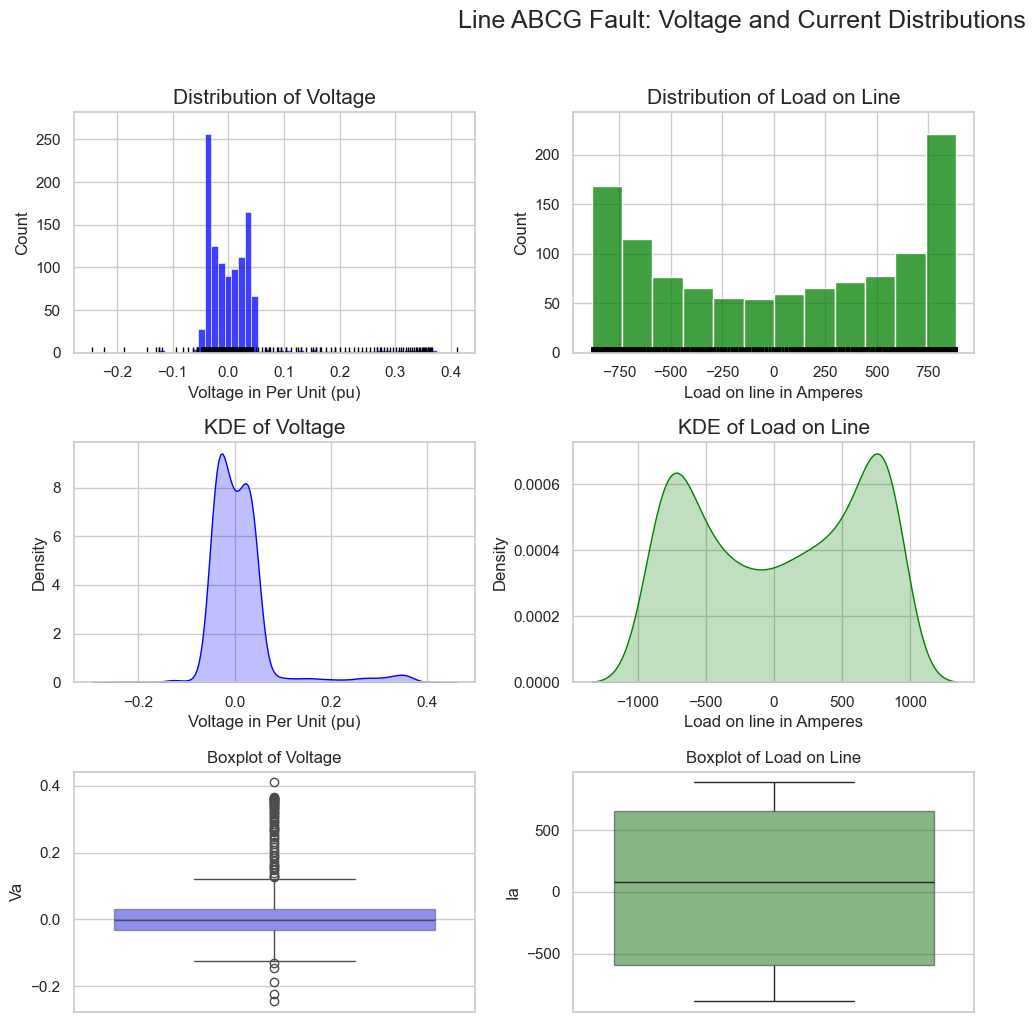

In [229]:
plt.figure(figsize=(15, 10))

# Histogram - Voltage
plt.subplot(3, 3, 1)
sns.histplot(Line_ABCG_Fault['Va'], kde=False, color='blue')
sns.rugplot(Line_ABCG_Fault['Va'], color='black')
plt.xlabel('Voltage in Per Unit (pu)', fontsize=12)
plt.title('Distribution of Voltage', fontsize=15)

# Histogram - Current
plt.subplot(3, 3, 2)
sns.histplot(Line_ABCG_Fault['Ia'], kde=False, color='green')
sns.rugplot(Line_ABCG_Fault['Ia'], color='black')
plt.xlabel('Load on line in Amperes', fontsize=12)
plt.title('Distribution of Load on Line', fontsize=15)

# KDE - Voltage
plt.subplot(3, 3, 4)
sns.kdeplot(Line_ABCG_Fault['Va'], fill=True, color='blue')
plt.xlabel('Voltage in Per Unit (pu)', fontsize=12)
plt.title('KDE of Voltage', fontsize=15)

# KDE - Current
plt.subplot(3, 3, 5)
sns.kdeplot(Line_ABCG_Fault['Ia'], fill=True, color='green')
plt.xlabel('Load on line in Amperes', fontsize=12)
plt.title('KDE of Load on Line', fontsize=15)

# Boxplot - Voltage
plt.subplot(3, 3, 7)
sns.boxplot(y=Line_ABCG_Fault['Va'], color='blue', boxprops=dict(alpha=0.5))
plt.title('Boxplot of Voltage')

# Boxplot - Current
plt.subplot(3, 3, 8)
sns.boxplot(y=Line_ABCG_Fault['Ia'], color='green', boxprops=dict(alpha=0.5))
plt.title('Boxplot of Load on Line')

plt.suptitle("Line ABCG Fault: Voltage and Current Distributions", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


### Feature and Label Seperation

#### Converting Categorical to Numerical

In [235]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_class['Fault_Type'] = encoder.fit_transform(df_class['Fault_Type'])
df_class.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3


#### Seperating Dependent and Independent variables

In [240]:
X = df_class.drop(['Fault_Type'],axis=1)
y = df_class['Fault_Type']

#### Train Test Split

In [243]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)

### Model Selection

#### Logistic Regression

C:\Users\xveen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy    : 90.08 %
Model Accuracy Score : 89.51 %
--------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.58      1.00      0.73       213
           1       0.96      1.00      0.98       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      0.17      0.29       198
           5       1.00      1.00      1.00       456

    accuracy                           0.90      1573
   macro avg       0.92      0.86      0.83      1573
weighted avg       0.94      0.90      0.87      1573

--------------------------------------------------------


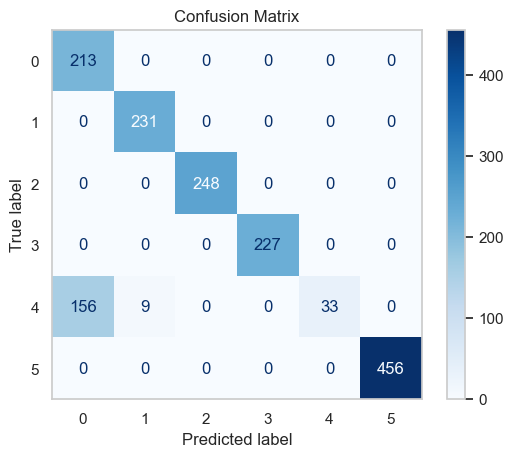

In [251]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_test, y_pred_lr) * 100, 2)

print("Training Accuracy    :", log_train, "%")
print("Model Accuracy Score :", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

# Updated confusion matrix plotting
disp = ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


#### Decision Tree Classifier


Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


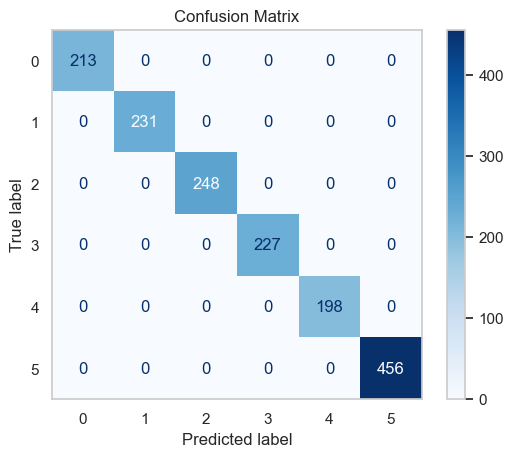

In [256]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train Decision Tree with some regularization
decision = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
decision.fit(X_train, y_train)

# Predictions
y_pred_dec = decision.predict(X_test)

# Scores
decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_test, y_pred_dec) * 100, 2)

# Output results
print("Training Accuracy    :", decision_train, "%")
print("Model Accuracy Score :", decision_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report:\n", classification_report(y_test, y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(decision, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


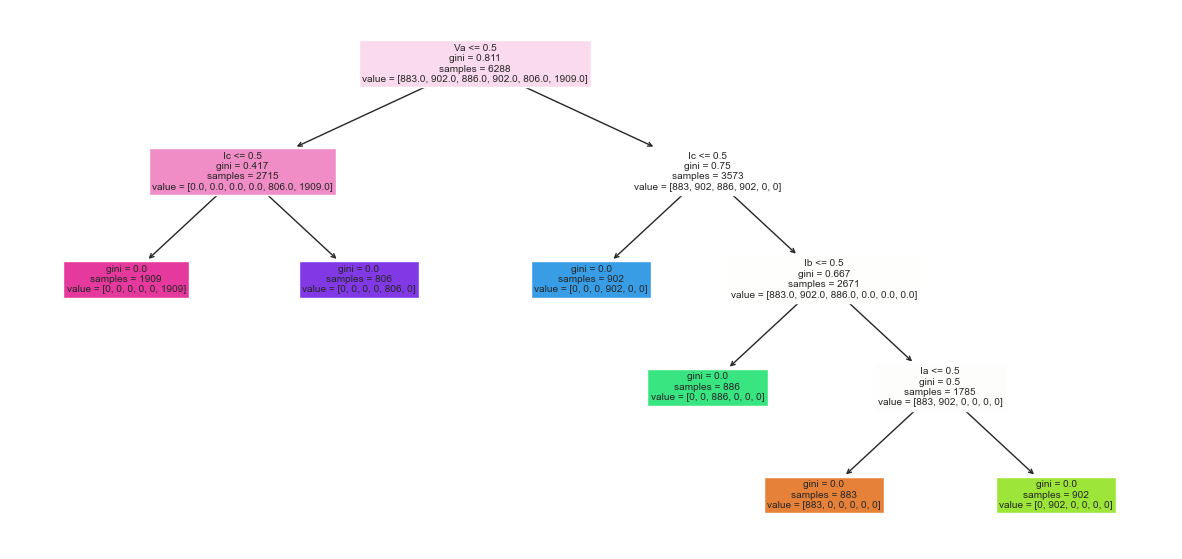

<Figure size 640x480 with 0 Axes>

In [258]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7))
plot_tree(decision,filled=True,feature_names=['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'])
plt.show()

plt.savefig("decision_tree.png", dpi=300)

In [260]:
from sklearn import tree
def tree_plot(model_name):
    plt.figure(figsize=(20,20))
    features = df_class.columns
    classes = ['NO Fault','Line A to Ground Fault','Line B to Line C Fault','Line A Line B to Ground Fault','Line A Line B Line C','Line A Line B Line C to Ground Fault']
    tree.plot_tree(model_name,feature_names=features,class_names=classes,filled=True)
    plt.show()

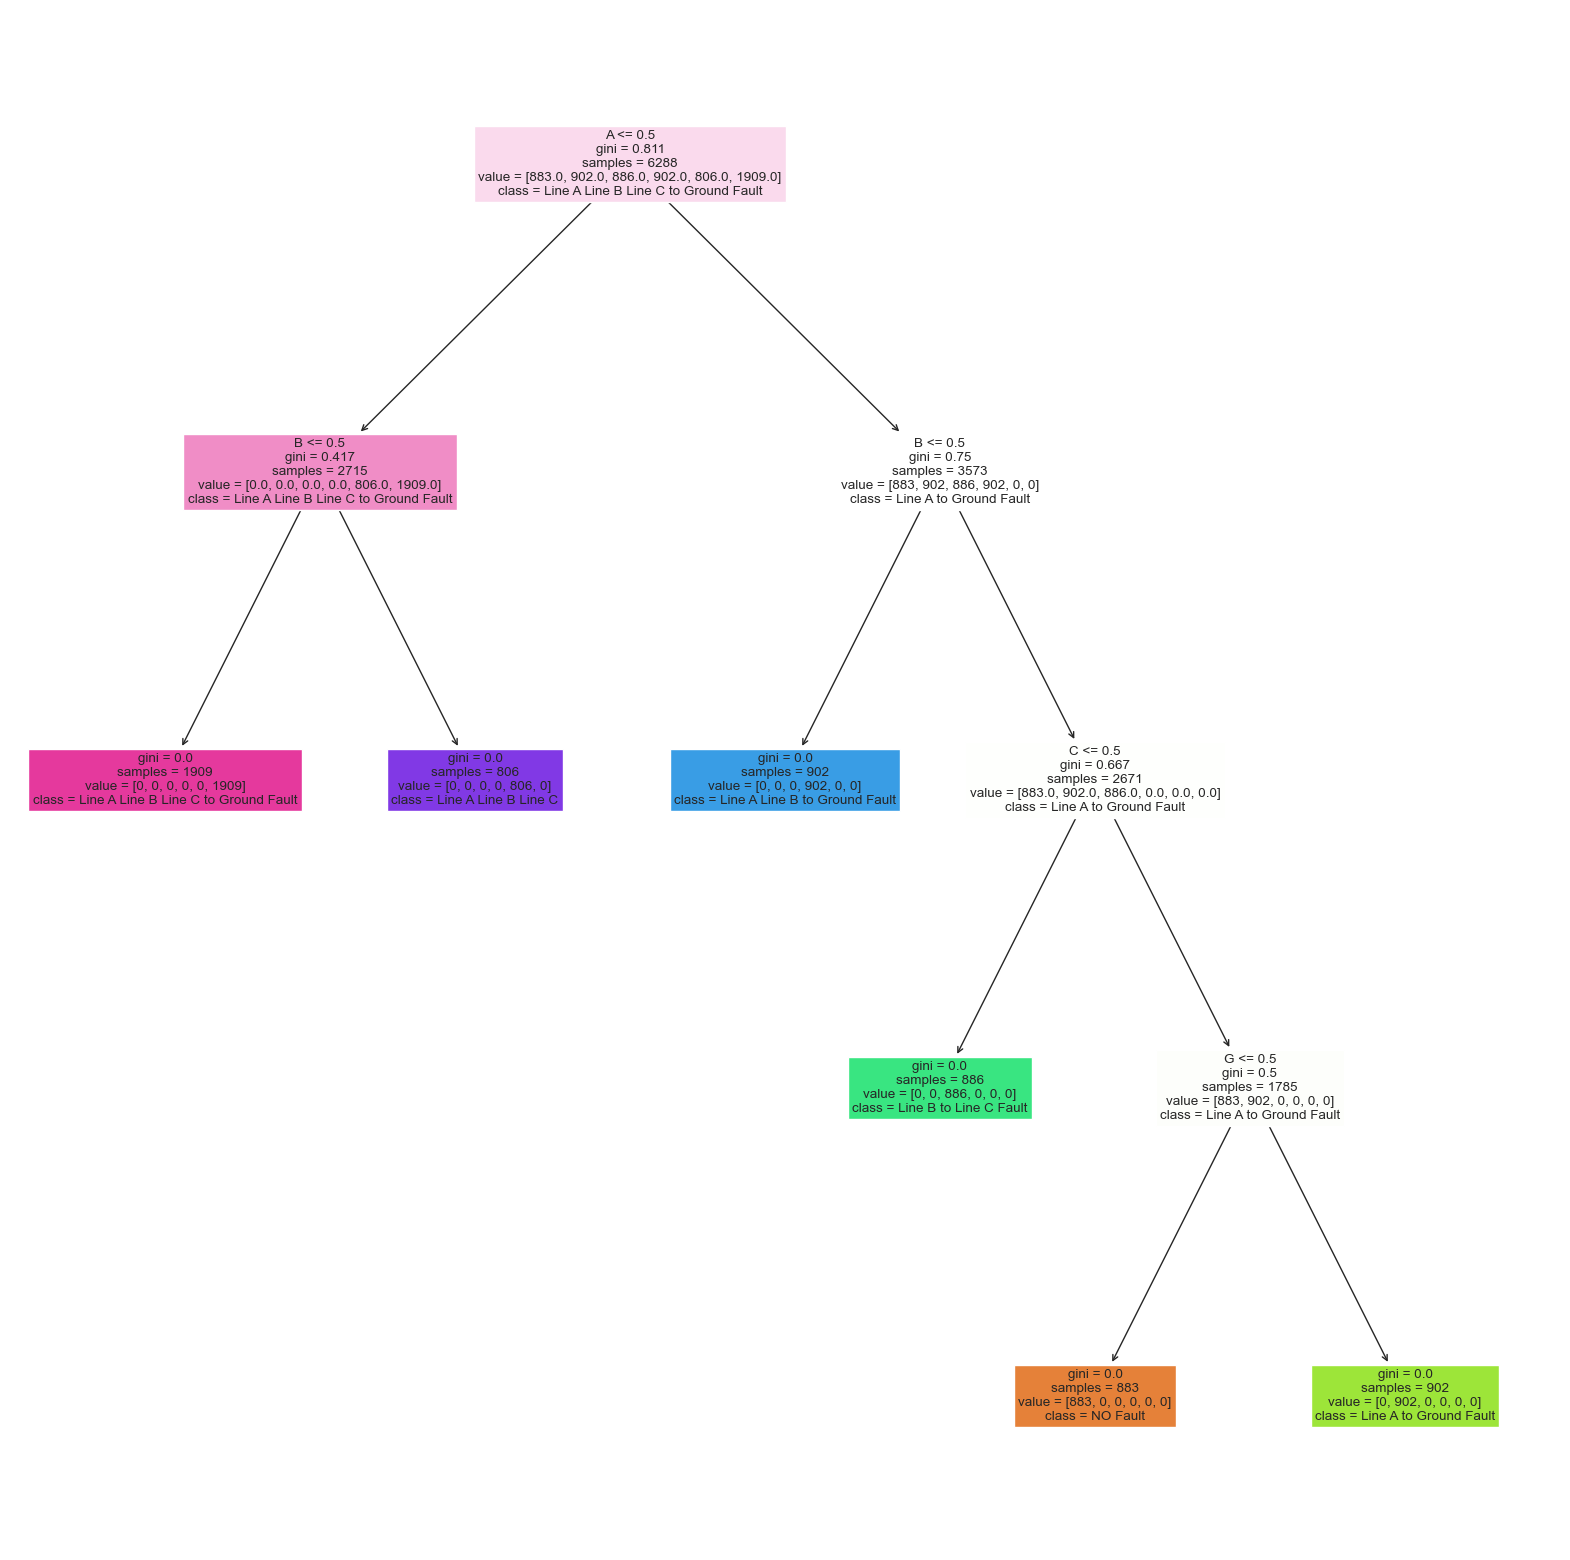

In [262]:
tree_plot(decision)

#### Random Forest Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


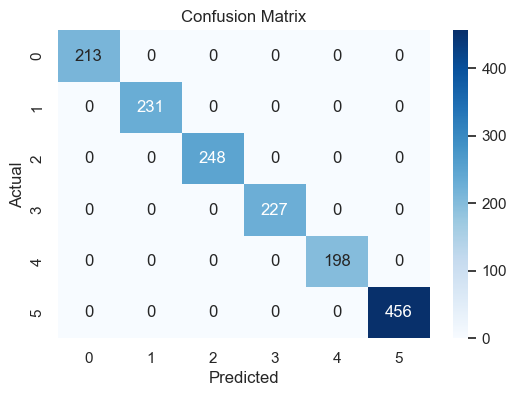

In [275]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on test data
y_pred_rf = random_forest.predict(X_test)

# Calculate accuracies (note: accuracy_score params order is (y_true, y_pred))
random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_test, y_pred_rf) * 100, 2)

# Print accuracies and classification report
print("Training Accuracy    :", random_forest_train, "%")
print("Model Accuracy Score :", random_forest_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

# Plot confusion matrix using seaborn heatmap (since plot_confusion_matrix is deprecated)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### XGB Classifier

In [292]:
import sys
print(sys.executable)


C:\Users\xveen\anaconda3\python.exe


In [294]:
!pip install xgboost


  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)


Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


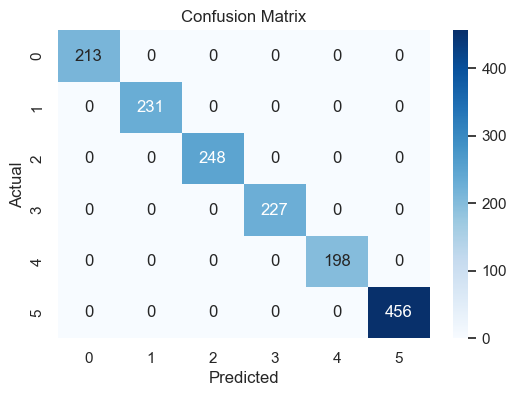

In [299]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the model without 'use_label_encoder' parameter
model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = model.predict(X_test)

# Calculate accuracies
xgb_train = round(model.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb) * 100, 2)

# Print accuracies and classification report
print("Training Accuracy    :", xgb_train, "%")
print("Model Accuracy Score :", xgb_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")

# Plot confusion matrix using seaborn heatmap
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### Support Vector Machines

Training Accuracy    : 76.51 %
Model Accuracy Score : 74.19 %
--------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.35      0.40       213
           1       0.43      0.29      0.35       231
           2       0.75      0.83      0.78       248
           3       0.77      0.86      0.81       227
           4       0.79      0.86      0.82       198
           5       0.87      1.00      0.93       456

    accuracy                           0.74      1573
   macro avg       0.68      0.70      0.68      1573
weighted avg       0.71      0.74      0.72      1573

--------------------------------------------------------


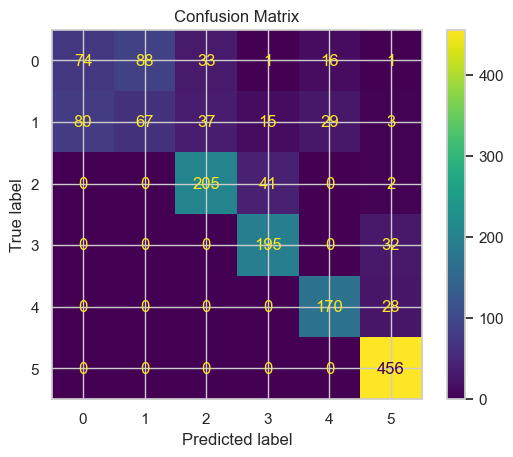

In [304]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train SVM model
svc = SVC()
svc.fit(X_train, y_train)

# Predict on test data
y_pred_svc = svc.predict(X_test)

# Calculate accuracies
svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc) * 100, 2)  # Fix order here

print("Training Accuracy    :", svc_train, "%")
print("Model Accuracy Score :", svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


### Comparing Different Models

In [307]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree', 'XGBClassifier'
    ],
    
    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train, xgb_train],
    
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy,
        xgb_accuracy
    ]
})

In [325]:
models.reset_index(drop=True).sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
    cmap='coolwarm').set_properties(**{'color': 'black','font-size': '15px'})


,Model,Training Accuracy,Model Accuracy Score
2,Random Forest,100.000000,100.000000
3,Decision Tree,100.000000,100.000000
4,XGBClassifier,100.000000,100.000000
0,Support Vector Machines,90.080000,89.510000
1,Logistic Regression,76.510000,74.190000


### Result Prediction

#### 1. Random Forest Classifier

In [321]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

[1 0 0 ... 0 0 5]


In [329]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{'color': 'Black','font-size': '15px'})

,Actual,Predicted
3988,0,0
7810,5,5
276,3,3
3014,4,4
1784,2,2


#### 2. Decision Tree Classifier

In [332]:
prediction2 = decision.predict(X_test)
print(prediction2)

[1 0 0 ... 0 0 5]


In [334]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction2})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{'color': 'Black','font-size': '15px'})

,Actual,Predicted
2229,2,2
551,3,3
3015,4,4
4154,0,0
5093,1,1


#### 3. XGB Classifier

In [339]:
prediction3 = model.predict(X_test)
print(prediction3)

[1 0 0 ... 0 0 5]


In [341]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction3})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'color': 'Black',
            'font-size': '15px'
        })

,Actual,Predicted
3631,0,0
1227,2,2
4823,1,1
3900,0,0
2619,4,4


#### 4. Support Vector Machines

In [346]:
prediction4 = svc.predict(X_test)
print(prediction4)

[0 2 1 ... 0 2 5]


In [348]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction4})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'color': 'Black',
            'font-size': '15px'
        })

,Actual,Predicted
3833,0,0
5553,5,5
3762,0,1
1543,2,2
3422,0,0


#### 5.  Logistic Regression

In [351]:
prediction5 = logreg.predict(X_test)
print(prediction5)

[1 0 0 ... 0 0 5]


In [353]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction5})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'color': 'Black',
            'font-size': '15px'
        })

,Actual,Predicted
6145,5,5
3558,0,0
2478,4,0
6552,5,5
6160,5,5


### Conclusions:

Random Forest, Decision Tree and XGBoost models appeared to have 100%, there is a chance that the model may be overfitting. 

We will also try K-Nearest Neighbours (KNN) and Gaussian Naive Bayes (GNB), which are valuable classifiers for benchmarking our model performance.


Training Accuracy    : 89.87 %
Model Accuracy Score : 82.96 %
--------------------------------------------------------
Classification_Report:
               precision    recall  f1-score   support

           0       0.44      0.45      0.44       213
           1       0.46      0.43      0.44       231
           2       0.96      0.96      0.96       248
           3       0.95      0.99      0.97       227
           4       1.00      0.96      0.98       198
           5       0.99      1.00      0.99       456

    accuracy                           0.83      1573
   macro avg       0.80      0.80      0.80      1573
weighted avg       0.83      0.83      0.83      1573

--------------------------------------------------------


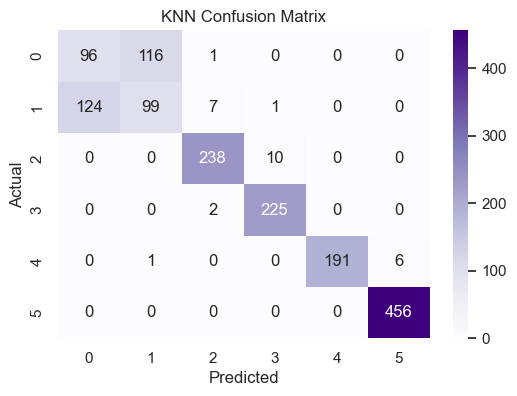

In [360]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Accuracy
knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn) * 100, 2)

# Output
print("Training Accuracy    :", knn_train, "%")
print("Model Accuracy Score :", knn_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report:\n", classification_report(y_test, y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix with Seaborn
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('my_plot_knn.png')
plt.show()


In [362]:
prediction6 = knn.predict(X_test)
print(prediction6)

[0 0 1 ... 0 1 5]


In [365]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction6})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'color': 'Black',
            'font-size': '15px'
        })

,Actual,Predicted
187,3,3
3862,0,1
6202,5,5
6325,5,5
6657,5,5


Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


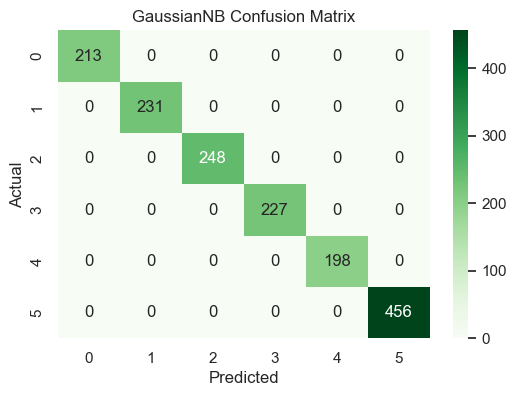

In [369]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train
GNB = GaussianNB()
GNB.fit(X_train, y_train)

# Predictions
y_pred_GNB = GNB.predict(X_test)

# Accuracy
GNB_train = round(GNB.score(X_train, y_train) * 100, 2)
GNB_accuracy = round(accuracy_score(y_test, y_pred_GNB) * 100, 2)

# Output
print("Training Accuracy    :", GNB_train, "%")
print("Model Accuracy Score :", GNB_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report:\n", classification_report(y_test, y_pred_GNB))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix with Seaborn
cm_GNB = confusion_matrix(y_test, y_pred_GNB)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_GNB, annot=True, fmt='d', cmap='Greens')
plt.title('GaussianNB Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('my_plot_GNB.png')
plt.show()


In [371]:
prediction7 = GNB.predict(X_test)
print(prediction7)

[1 0 0 ... 0 0 5]


In [373]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction7})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'color': 'Black',
            'font-size': '15px'
        })

,Actual,Predicted
4803,1,1
352,3,3
106,3,3
4516,1,1
1141,2,2
